# ch 12_4. word cloud

이전 챕터에서 2022년 한국 야구 데이터 셋을 토큰화 했습니다. 이번 챕터에서는 가장 기본적인 자연어 데이터 시각화 기법인 워드 클라우드에 대해서 알아보겠습니다. 워드 클라우드는 특정 단어와 함께 등장한 단어의 빈도 수를 집계해서, 어떤 단어가 연관되어 있는지를 시각적으로 표현하는 기법입니다.

In [6]:
!pip install wordcloud

## 선수 이름 데이터 준비
우리가 만들어보고 싶은 건 특정 선수 이름이 주어지면, 그 선수와 함께 언급되는 단어들을 시각적으로 보여주는 것입니다. 이를 위해서 먼저 토큰화 한 뉴스 기사 데이터에서 특정 선수가 언급되면, 함께 언급된 단어들의 빈도수를 세어 딕셔너리 형태로 만들어보겠습니다. 

먼저 기사에 선수 이름이 포함되었는지 여부를 판단하기 위해 크롤러 시간에 짰던 코드를 재사용합니다.

In [16]:
import pandas as pd

In [17]:
df = pd.read_csv("./data/baseball_players.csv", index_col=["구단"])

In [18]:
positions = ["투수", "포수", "내야수", "외야수"]
for position in positions:
    df[position] = df[position].apply(lambda x: x.split("\n"))

In [19]:
df

,투수,포수,내야수,외야수
구단,,,,
롯데,"[김진욱, 한현희, 최준용, 박세웅, 구승민, 김상수, 반즈, 신정락, 최이준, 김...","[유강남, 정보근]","[안치홍, 한동희, 김민수, 노진혁, 박승욱, 이학주, 전준우, 정훈]","[안권수, 렉스, 김민석, 고승민, 윤동희]"
SSG,"[고효준, 서진용, 김광현, 맥카티, 노경은, 박민호, 문승원, 오원석, 임준섭, ...","[김민식, 조형우]","[최정, 박성한, 김건웅, 최주환, 전의산, 최경모, 김성현]","[추신수, 에레디아, 한유섬, 오태곤, 김정민, 최상민]"
LG,"[임찬규, 함덕주, 정우영, 진해수, 켈리, 이정용, 배재준, 박명근, 김진성, 플...","[김기연, 박동원]","[오지환, 서건창, 김민성, 문보경, 송찬의, 정주현]","[박해민, 김현수, 오스틴, 신민재, 홍창기, 문성주]"
두산,"[박치국, 홍건희, 이병헌, 김동주, 최지강, 알칸타라, 김명신, 곽빈, 최원준, ...","[장승현, 양의지]","[허경민, 강승호, 전민재, 김재호, 양석환, 이유찬]","[로하스, 정수빈, 김재환, 강진성, 조수행, 양찬열, 송승환]"
NC,"[송명기, 페디, 김태현, 김영규, 김시훈, 임정호, 하준영, 이용준, 신민혁, 김...","[박세혁, 안중열]","[도태훈, 박민우, 오영수, 서호철, 오태양, 윤형준, 김한별, 김주원]","[천재환, 김성욱, 손아섭, 박건우, 한석현]"
KIA,"[윤영철, 임기영, 이준영, 최지민, 메디나, 이의리, 장현식, 전상현, 김기훈, ...","[주효상, 한승택]","[박찬호, 김규성, 김선빈, 변우혁, 황대인, 홍종표, 류지혁]","[이우성, 김호령, 소크라테스, 최형우, 고종욱, 이창진]"
삼성,"[김대우, 원태인, 우규민, 이승현, 오승환, 김태훈, 백정현, 뷰캐넌, 문용익, ...","[이병헌, 김태군, 강민호]","[김재상, 이성규, 김영웅, 조민성, 오재일, 김지찬, 이재현, 공민규]","[윤정빈, 김성윤, 구자욱, 피렐라]"
키움,"[최원태, 김재웅, 김성진, 양현, 안우진, 요키시, 임창민, 하영민, 정찬헌, 김...","[김동헌, 이지영]","[전병우, 이원석, 김태진, 러셀, 김혜성, 김휘집]","[김준완, 이용규, 임병욱, 이형종, 박찬혁, 이정후, 이병규]"
KT,"[고영표, 김민, 엄상백, 슐서, 손동현, 벤자민, 박세진, 김영현, 조이현, 박영...","[장성우, 김준태]","[문상준, 황재균, 오윤석, 강민성, 강백호, 박경수, 김상수]","[이시원, 조용호, 문상철, 알포드, 홍현빈, 김민혁]"


In [29]:
df.values.flatten()

array([list(['김진욱', '한현희', '최준용', '박세웅', '구승민', '김상수', '반즈', '신정락', '최이준', '김원중', '윤명준', '나균안', '스트레일리']),
       list(['유강남', '정보근']),
       list(['안치홍', '한동희', '김민수', '노진혁', '박승욱', '이학주', '전준우', '정훈']),
       list(['안권수', '렉스', '김민석', '고승민', '윤동희']),
       list(['고효준', '서진용', '김광현', '맥카티', '노경은', '박민호', '문승원', '오원석', '임준섭', '신헌민', '박종훈', '백승건', '최민준']),
       list(['김민식', '조형우']),
       list(['최정', '박성한', '김건웅', '최주환', '전의산', '최경모', '김성현']),
       list(['추신수', '에레디아', '한유섬', '오태곤', '김정민', '최상민']),
       list(['임찬규', '함덕주', '정우영', '진해수', '켈리', '이정용', '배재준', '박명근', '김진성', '플럿코', '김윤식', '이지강', '유영찬', '최성훈']),
       list(['김기연', '박동원']),
       list(['오지환', '서건창', '김민성', '문보경', '송찬의', '정주현']),
       list(['박해민', '김현수', '오스틴', '신민재', '홍창기', '문성주']),
       list(['박치국', '홍건희', '이병헌', '김동주', '최지강', '알칸타라', '김명신', '곽빈', '최원준', '김유성', '고봉재', '최승용', '정철원']),
       list(['장승현', '양의지']),
       list(['허경민', '강승호', '전민재', '김재호', '양석환', '이유찬']),
       list(['로하스', '정수빈', '김재환', '강진성', '

In [33]:
total_players = []

for player_names in df.values.flatten():
    total_players.extend(player_names)
total_players = set(total_players)

In [34]:
print(total_players, len(total_players))

{'홍창기', '이원석', '우규민', '문승원', '박상원', '구자욱', '이선우', '페냐', '하준영', '안중열', '최지민', '윤동희', '플럿코', '도태훈', '임찬규', '임정호', '엄상백', '임병욱', '슐서', '박치국', '고효준', '박명근', '최민준', '피렐라', '켈리', '이용준', '홍종표', '김준형', '김민식', '조민석', '문용익', '최원태', '반즈', '박민우', '양찬열', '이창진', '임준섭', '남지민', '노경은', '박성한', '이태양', '김준완', '최지강', '강재민', '정보근', '이용규', '김민우', '이의리', '김지찬', '문상철', '원태인', '김기훈', '노진혁', '장성우', '최성훈', '변우혁', '김정민', '김진성', '소크라테스', '박찬혁', '김주원', '김동혁', '김태연', '진해수', '이정용', '에레디아', '문현빈', '김유성', '러셀', '이지영', '이병헌', '김영웅', '김성진', '강승호', '이준영', '윤형준', '이재현', '구승민', '송찬의', '김재호', '안우진', '조형우', '김태훈', '윤정빈', '김민성', '문성주', '박경수', '정수빈', '김서현', '페디', '양의지', '문동주', '한승주', '알칸타라', '곽빈', '이승현', '송승환', '이학주', '김성욱', '손동현', '조용호', '김규성', '이성곤', '한유섬', '김휘집', '김혜성', '이준호', '장민재', '백정현', '김광현', '류지혁', '박찬호', '장현식', '홍현빈', '박건우', '김민석', '한동희', '김명신', '백승건', '홍건희', '고종욱', '김시훈', '전민재', '앤더슨', '정은원', '채은성', '임창민', '윤대경', '박승욱', '강진성', '박종훈', '김범수', '이성규', '오지환', '정찬헌', '유강남', '윤영철', '손아섭', '유영찬', '최형우', '김기연', '김진욱', '이지강', '

## 기사 토큰화 환 데이터 셋 준비

토큰화한 데이터 셋을 순회하며 특정 기사에 선수 이름이 포함되어 있을 경우, 함께 언급된 일반 명사, 고유 명사의 빈도수를 세어서 딕셔너리에 추가합니다.

In [35]:
import pandas as pd
from tqdm import tqdm

In [36]:
df = pd.read_csv("./data/baseball_tokenized_10K.csv")

In [37]:
df

,url,datetime_str,title,content,title_tokens,content_tokens
0,https://sports.news.naver.com/news?oid=109&aid...,20221221,"""성적 향상에 도움이 된다면..."" 원태인, 미국 플로리다로 떠나는 이유","""구속, 구위, 컨트롤, 이닝 소화 능력 등 모든 면에서 현재 능력보다 한 단계 향...","[('""', 'SS'), ('성적', 'NNP'), ('향상', 'NNG'), ('...","[('""', 'SS'), ('구속', 'NNP'), (',', 'SP'), ('구위..."
1,https://sports.news.naver.com/news?oid=421&aid...,20220325,"""재환이와 승부를 안한다""…김태형 감독의 라인업 고민, '키'는 페르난데스",(서울=뉴스1) 서장원 기자 = 김태형 두산 베어스 감독이 외국인 타자 호세 페르난...,"[('""', 'SS'), ('재화', 'NNP'), ('ㄴ', 'ETM'), ('이...","[('(', 'SS'), ('서울', 'NNP'), ('=', 'SW'), ('뉴스..."
2,https://sports.news.naver.com/news?oid=108&aid...,20220401,"두산, 2022시즌 팬북 발행... 엠블럼 스티커-선수단 포스터 제공","두산 베어스가 2022시즌 개막을 앞두고 새로운 팬북을 내놓았다.두산은 1일 ""20...","[('두산', 'NNP'), (',', 'SP'), ('2022', 'SN'), (...","[('두산', 'NNP'), ('베어스', 'NNP'), ('가', 'JKS'), ..."
3,https://sports.news.naver.com/news?oid=529&aid...,20220125,"'캡틴 어게인' 박경수 ""후배들아, 우리 수원에서 우승 한 번만 더 하자."" [SP...","-'2021 KS MVP' KT WIZ 내야수 박경수, 2022년 주장으로 다시 돌...","[(""'"", 'SS'), ('캡틴', 'NNP'), ('어게인', 'NNP'), (...","[('-', 'SS'), (""'"", 'SS'), ('2021', 'SN'), ('K..."
4,https://sports.news.naver.com/news?oid=477&aid...,20220426,"""포지션 변경 고려""…NC 정현, 자취 감춘 이유 있었네","""포지션 변경도 고려하고 있다.""이동욱 NC 다이노스 감독이 26일 잠실야구장에서 ...","[('""', 'SS'), ('포지션', 'NNP'), ('변경', 'NNG'), (...","[('""', 'SS'), ('포지션', 'NNP'), ('변경', 'NNG'), (..."
...,...,...,...,...,...,...
9995,https://sports.news.naver.com/news?oid=109&aid...,20220525,"양현종 타이거즈 최다승 새 역사…KIA, 대구 3연전 위닝 시리즈 예약 [대구 리뷰]",KIA가 25일 대구 원정 경기에서 삼성을 11-5로 꺾고 위닝 시리즈를 예약했다....,"[('양현종', 'NNP'), ('타이', 'NNP'), ('거즈', 'NNP'),...","[('KIA', 'NNP'), ('가', 'JKS'), ('25', 'SN'), (..."
9996,https://sports.news.naver.com/news?oid=117&aid...,20221105,"'3회 5점 빅이닝' 키움, SSG에 6-3 승리…시리즈 2승 2패 균형 [KS]",3회말 빅이닝이 승부를 갈랐다. 키움이 웃었다.키움 히어로즈는 5일 서울 고척스카이...,"[(""'"", 'SS'), ('3', 'SN'), ('회', 'NNB'), ('5',...","[('3', 'SN'), ('회', 'NNB'), ('말', 'NNB'), ('빅'..."
9997,https://sports.news.naver.com/news?oid=031&aid...,20220922,"LG, 은퇴투어 롯데 이대호에 목각 기념패·메시지 보드 전달",롯데 자이언츠 이대호(내야수)가 LG 트윈스를 상대로 올 시즌 원정팀 대상 은퇴투어...,"[('LG', 'NNP'), (',', 'SP'), ('은퇴', 'NNG'), ('...","[('롯데', 'NNP'), ('자이언츠', 'NNP'), ('이대호', 'NNP'..."
9998,https://sports.news.naver.com/news?oid=410&aid...,20220630,“안우진은 분명 한 단계 성장했다” [MK현장],“(안)우진이는 분명 한 단계 성장했습니다.”지금의 키움 히어로즈를 이야기할 때 안...,"[('“', 'SS'), ('안우진', 'NNP'), ('은', 'JX'), ('분...","[('“', 'SS'), ('(', 'SS'), ('안', 'NNP'), (')',..."


In [38]:
df = df[["content_tokens"]]

In [39]:
df

,content_tokens
0,"[('""', 'SS'), ('구속', 'NNP'), (',', 'SP'), ('구위..."
1,"[('(', 'SS'), ('서울', 'NNP'), ('=', 'SW'), ('뉴스..."
2,"[('두산', 'NNP'), ('베어스', 'NNP'), ('가', 'JKS'), ..."
3,"[('-', 'SS'), (""'"", 'SS'), ('2021', 'SN'), ('K..."
4,"[('""', 'SS'), ('포지션', 'NNP'), ('변경', 'NNG'), (..."
...,...
9995,"[('KIA', 'NNP'), ('가', 'JKS'), ('25', 'SN'), (..."
9996,"[('3', 'SN'), ('회', 'NNB'), ('말', 'NNB'), ('빅'..."
9997,"[('롯데', 'NNP'), ('자이언츠', 'NNP'), ('이대호', 'NNP'..."
9998,"[('“', 'SS'), ('(', 'SS'), ('안', 'NNP'), (')',..."


### 결측치 확인 및 제거

In [41]:
df.isnull().sum()

content_tokens    1
dtype: int64

In [42]:
df = df.dropna()

### 명사 추출
제목과 본문을 토큰화한 문자열에서 일반 명사와 고유 명사만 추출하여 데이터 프레임의 컬럼으로 추가합니다.

In [57]:
from tqdm import tqdm

tqdm.pandas()
df["content_tokens"] = df["content_tokens"].progress_apply(lambda x: eval(x))

100%|█████████████████████████████████████| 9999/9999 [00:16<00:00, 608.44it/s]
/var/folders/wx/2vw1xwz972zdxff5h8gzrml00000gn/T/ipykernel_79449/2934380343.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["content_tokens"] = df["content_tokens"].progress_apply(lambda x: eval(x))


In [65]:
def extract_nouns(content_tokens):
    return [text for text, tag in content_tokens if tag in ("NNP", "NNG")]

In [74]:
tqdm.pandas()
df["content_nouns"] = df["content_tokens"].progress_apply(lambda x: extract_nouns(x))

100%|███████████████████████████████████| 9999/9999 [00:00<00:00, 36064.76it/s]
/var/folders/wx/2vw1xwz972zdxff5h8gzrml00000gn/T/ipykernel_79449/62787088.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["content_nouns"] = df["content_tokens"].progress_apply(lambda x: extract_nouns(x))


In [75]:
df

,content_tokens,content_nouns
0,"[("", SS), (구속, NNP), (,, SP), (구위, NNG), (,, S...","[구속, 구위, 컨트롤, 이닝, 소화, 능력, 면, 능력, 단계, 향상, 게, 목표..."
1,"[((, SS), (서울, NNP), (=, SW), (뉴스1, NNP), (), ...","[서울, 뉴스1, 서장원, 기자, 김태형, 두산, 베어스, 감독, 외국인, 타자, ..."
2,"[(두산, NNP), (베어스, NNP), (가, JKS), (2022, SN), ...","[두산, 베어스, 시즌, 개막, 팬, 북, 두산, 2022년, 팬, 북, 발행, 구..."
3,"[(-, SS), (', SS), (2021, SN), (KS, SL), (MVP,...","[KT, 내야수, 박경수, 주장, 후배, 숟가락, 팬, 뒤, 목발, 세리, 모니, ..."
4,"[("", SS), (포지션, NNP), (변경, NNG), (도, JX), (고려,...","[포지션, 변경, 고려, 이동욱, NC, 다이노스, 감독, 잠실야구장, 두산, 베어..."
...,...,...
9995,"[(KIA, NNP), (가, JKS), (25, SN), (일, NNB), (대구...","[KIA, 대구, 원정, 경기, 삼성, -5, 시리즈, 예약, 에이스, 양현종, 타..."
9996,"[(3, SN), (회, NNB), (말, NNB), (빅, NNG), (이닝, N...","[빅, 이닝, 승부, 키움, 키움, 히어로즈, 서울, 고척스카이돔, 신한은행, KB..."
9997,"[(롯데, NNP), (자이언츠, NNP), (이대호, NNP), ((, SS), ...","[롯데, 자이언츠, 이대호, 내야수, LG, 트윈스, 상대로, 시즌, 원정, 팀, ..."
9998,"[(“, SS), ((, SS), (안, NNP), (), SS), (우진, NNP...","[안, 우진, 단계, 성장, 지금, 키움, 히어로즈, 이야기, 때, 안우진, 현시점..."


### 동시 출현 빈도 집계
특정 선수의 이름과 함께 등장한 명사를 defaultdict와 Counter를 이용해서 집계합니다.

In [77]:
from collections import Counter, defaultdict

# K: 선수 이름, V: 함께 등장한 단어의 빈도 수
# ex) "김광현": {"선발": 1000, "승리": 500}
word_count_dict = defaultdict(Counter)

In [84]:
def count_words(content_nouns):
    content_nouns_set = set(content_nouns)
    player_name_nouns = total_players.intersection(content_nouns_set)
    for player_name in player_name_nouns:
        c = Counter([x for x in content_nouns if x != player_name])
        word_count_dict[player_name] += c

In [87]:
from tqdm import tqdm

for content_nouns in tqdm(df["content_nouns"]):
    count_words(content_nouns)

100%|████████████████████████████████████| 9999/9999 [00:06<00:00, 1607.67it/s]


## word cloud 시각화

함께 등장하는 단어를 세었으니 이제 워드 클라우드를 만들어보겠습니다. 폰트 적용 부분은 아래 가이드를 읽어보고, 본인의 환경에 맞게 코드를 수정하면 됩니다.

- [윈도우 폰트 적용 가이드](https://doitgrow.com/34#:~:text=%EC%9B%8C%EB%93%9C%ED%81%B4%EB%9D%BC%EC%9A%B0%EB%93%9C%EC%97%90%20%EC%82%AC%EC%9A%A9%ED%95%A0%20%ED%8F%B0%ED%8A%B8,%EA%B2%B0%EA%B3%BC%EB%A5%BC%20%ED%99%95%EC%9D%B8%ED%95%A0%20%EC%88%98%20%EC%9E%88%EC%8A%B5%EB%8B%88%EB%8B%A4.)
- [맥 폰트 적용 가이드](https://business-analytics.tistory.com/3)

In [100]:
from wordcloud import WordCloud
from matplotlib import pyplot as plt

def visualize_wordcloud(player_name, color):
    wordcloud = WordCloud(
        font_path="/Library/Fonts/NanumGothic.otf",
        width=1000,
        height=400,
        background_color="white",
        colormap=color,
    ).generate_from_frequencies(word_count_dict[player_name])

    plt.figure(figsize=(10, 10))
    plt.imshow(wordcloud)

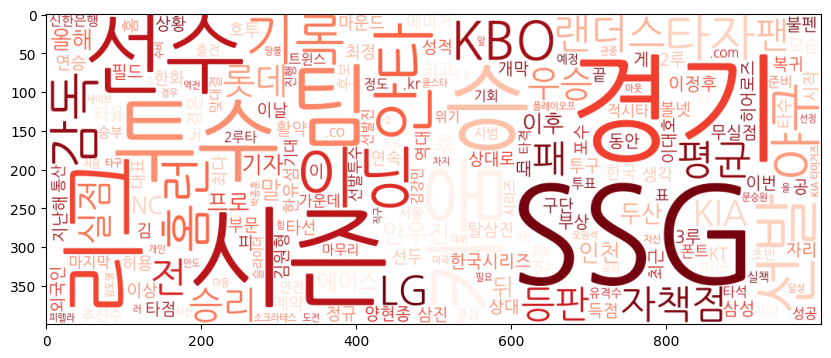

In [101]:
visualize_wordcloud("김광현", "Reds")

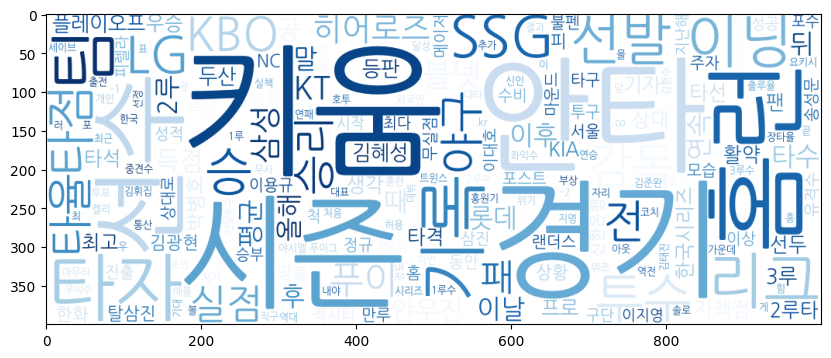

In [102]:
visualize_wordcloud("이정후", "Blues")

## 정리
이번 챕터에서는 자연어 데이터 시각화 하면 가장 먼저 떠오르는 워드 클라우드를 만들어 보았습니다. 사실 워드 클라우드는 직관적으로 의미를 전달하는 것이 어려워서 잘 사용되지 않습니다. 이어지는 챕터들에서 더 정교화 된 자연어처리 알고리즘들을 배워보겠습니다.